<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB
Customer
 None
customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64
Jumlah duplikasi:  6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  

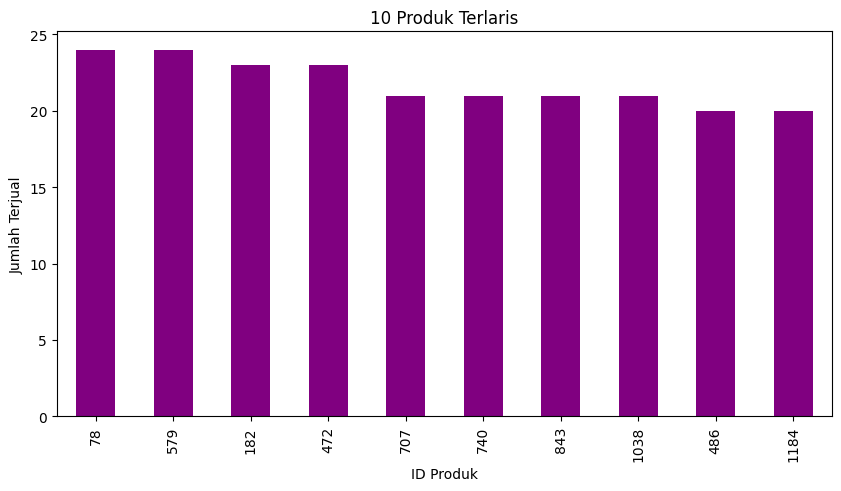

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

#Check the data type of each column
print("Customer\n", customers_df.info())

print(customers_df.isna().sum())

print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

orders_df.info()
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

product_df.info()
print("Jumlah duplikasi: ",product_df.duplicated().sum())
product_df.describe()

sales_df.info()
sales_df.isna().sum()
print("Jumlah duplikasi: ",sales_df.duplicated().sum())
sales_df.describe()

#Cleaning Data Customer
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df[customers_df.gender.isna()]
customers_df.gender.value_counts()
customers_df.fillna(value="Prefer not to say", inplace=True)
customers_df.isna().sum()
customers_df[customers_df.age == customers_df.age.max()]
customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), 70)
customers_df[customers_df.age == customers_df.age.max()]
customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), 50)
customers_df.describe()

#Cleaning Data Orders
datetime_columns = ["order_date", "delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

#Cleaning Data Product
product_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", product_df.duplicated().sum())

sales_df[sales_df.total_price.isna()]
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]
sales_df.isna().sum()

#Merging Data
sales_df = sales_df.merge(product_df, how="left", on="product_id")
sales_df = sales_df.merge(orders_df, how="left", on="order_id")
sales_df = sales_df.merge(customers_df, how="left", on="customer_id")
sales_df.head()
sales_df.info()

#Data Analysis
top_products = sales_df.groupby('product_id')['quantity_x'].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='purple')
plt.title("10 Produk Terlaris")
plt.xlabel("ID Produk")
plt.ylabel("Jumlah Terjual")
plt.show()